In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import lime
import lime.lime_tabular
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [3]:
fao_data = pd.read_csv("datasets/latest0205.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Rodenticides – Other-3,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Bipiridils-3,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Herbicides – Sulfonyl ureas-3,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2,Rodenticides – Anti-coagulants-3
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.00,5.00,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01,0.0,0.0,0.0,Sunflower seed,-0.8656,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,-81.0,0.0,0.0,31.0,0.41,0.41,0.41
2020-01-01,-106607.0,-55584.0,26854.0,Hop cones,0.2323,-15.0,-241.0,142.0,140.0,-773.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.41,0.41
2020-01-01,0.0,0.0,0.0,Rape or colza seed,1.4064,0.0,0.0,0.0,0.0,0.0,...,0.0,-84.0,0.0,0.0,4.0,0.0,0.0,0.10,0.41,0.41
2020-01-01,0.0,0.0,0.0,Soya beans,-1.0056,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-84.0,0.0,0.0,4.0,0.0,0.10,0.10,0.41


In [4]:
cat_names = fao_data['Category'].unique()
cat_names

array(['Fruits and Nuts', 'Vegetables and Legumes', 'Cereals',
       'Industrial_crops'], dtype=object)

Intercept 47.59898017263542
Prediction_local [8.63966494]
Right: 7.6977


,Features_Fruits and Nuts,Coeffcients (GBR)_Fruits and Nuts
0,Apples <= 0.00,-18.966500
1,Pears <= 0.00,-14.639334
2,Grapes <= 0.00,-6.177802
3,Other stone fruits <= 0.00,-1.984654
4,Apricots <= 0.00,1.804777
5,Yield(tonnes/ha)-1 <= 0.17,1.302567
6,Strawberries <= 0.00,-1.273058
7,"Walnuts, in shell <= 0.00",0.916906
8,Herbicides – Bipiridils-1 <= 0.51,0.839401
9,Gooseberries <= 0.00,-0.781617


Intercept 218.73132932552866
Prediction_local [23.6246459]
Right: 25.5256


,Features_Vegetables and Legumes,Coeffcients (GBR)_Vegetables and Legumes
0,Tomatoes <= 0.00,-140.010483
1,Cucumbers and gherkins <= 0.00,-37.387146
2,Sugar beet <= 0.00,-34.003301
3,"Chillies and peppers, green (Capsicum spp. and...",-25.724364
4,"Peas, dry <= 0.00",13.864322
5,"Beans, dry <= 0.00",10.900782
6,"Other beans, green <= 0.00",9.557871
7,Lupins <= 0.00,7.221933
8,0.04 < Yield(tonnes/ha)-2 <= 0.21,6.596952
9,"Pumpkins, squash and gourds > 0.00",-6.123250


Intercept -3.025930370767509
Prediction_local [1.11834476]
Right: 1.5886000000000005


,Features_Cereals,Coeffcients (GBR)_Cereals
0,Mixed grain <= 0.00,4.360876
1,Maize (corn) <= 0.00,-2.001203
2,Barley <= 0.00,1.099058
3,Wheat > 0.00,0.893312
4,Triticale <= 0.00,-0.285232
5,Insecticides – Other-3 <= 0.30,-0.110941
6,"Fung & Bact – Triazoles, diazoles-3 <= 0.50",0.096151
7,Nutrient nitrogen N (total) - tonnes-1 <= 0.51,0.092566
8,Herbicides – Carbamates-2 <= 0.51,-0.074312
9,Mineral Oils-1 <= 0.51,0.074001


Intercept -0.3265594296816519
Prediction_local [2.24627607]
Right: 2.2251000000000003


,Features_Industrial_crops,Coeffcients (GBR)_Industrial_crops
0,Rape or colza seed > 0.00,2.837216
1,Vetches <= 0.00,0.459891
2,Insecticides – Other-3 <= 0.31,-0.391499
3,Unmanufactured tobacco <= 0.00,-0.217112
4,Yield(tonnes/ha)-1 <= 0.35,0.100544
5,Mineral Oils <= 0.51,-0.077117
6,Herbicides – Triazines-3 <= 0.49,-0.074955
7,Fung & Bact – Inorganics-2 <= 0.50,-0.066201
8,Herbicides – Carbamates-3 <= 0.51,0.060632
9,Insecticides – Other-2 <= 0.31,-0.058564


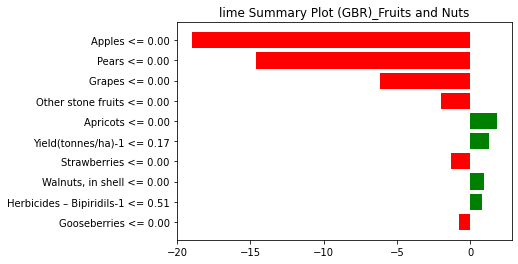

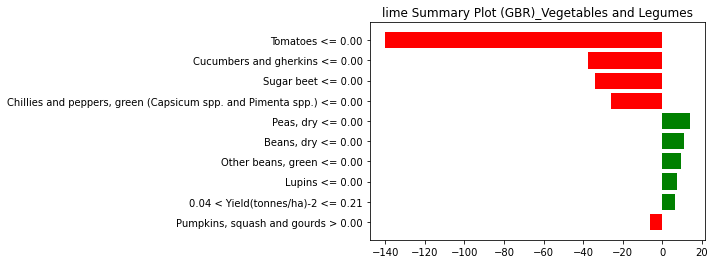

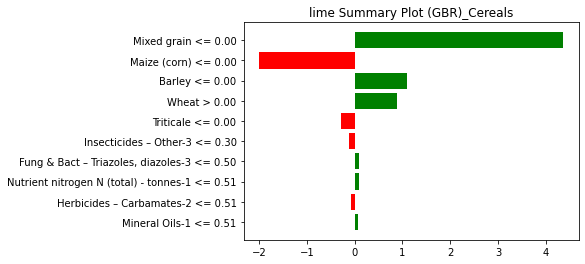

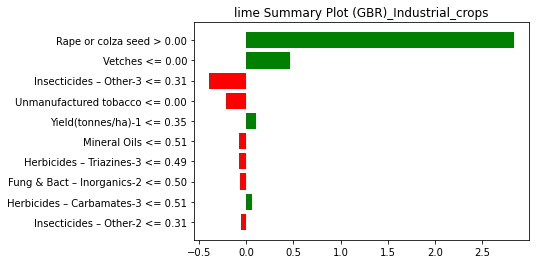

In [6]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Item"]], prefix='', prefix_sep='')

    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    

    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)

    x = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)
  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=False)
    regressor = GradientBoostingRegressor(max_depth=100, n_estimators=1000, learning_rate= 1)
    regressor.fit(x_train, y_train)


    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[0], 
     regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (GBR)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (GBR)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (GBR)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_GBR.docx')
